<a href="https://colab.research.google.com/github/codedyasai/Python_Intermediate/blob/main/2_8_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열분석

1. 시계열 데이터란
- 시간에 순차적으로 관측된 값들의 집합
- 예측 모델에서 시간을 변수로 사용하는 특징을 가진 데이터

2. 시계열 데이터 분석이란
- 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법으로 과거의 패턴이 미래에도 지속된다는 안정성을 기본적인 가정으로 구현한다.

3. 시계열 분해법이란
- 시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법
- 추세(Trend): 데이터가 장기적으로 증가하거나 감소하는것이며, 추세가 꼭 선형적일 필요는 없다.
- 순환(Cycle): 주기적인 패턴이나 추세를 보이는 것
- 계절성(Seasonal): 시계열 데이터에서 나타나는 주기적인 패턴 또는 변동을 나타내는 개념
- 불규칙요소


# 필수 라이브러리 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 데이터 셋 로딩

- Data Source : https://www.blockchain.com/explorer/charts

In [ ]:
bitcoin = pd.read_csv('market-price.csv' , names = ['day', 'prices'])
bitcoin.head()

,day,prices
0,2021/06/30 0:00,35847.70
1,2021/07/01 0:00,35047.36
2,2021/07/02 0:00,33536.88
3,2021/07/03 0:00,33856.86
4,2021/07/04 0:00,34688.98


### 탐색적 데이터 분석(EDA)

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   prices  361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
# tail
bitcoin.tail()

,day,prices
356,2022/06/21 0:00,20582.29
357,2022/06/22 0:00,20703.51
358,2022/06/23 0:00,19953.71
359,2022/06/24 0:00,21088.30
360,2022/06/25 0:00,21194.68


In [ ]:
# 시계열 데이터로 변환
bitcoin['day'] = pd.to_datetime(bitcoin['day'])
bitcoin.set_index('day', inplace= True)
bitcoin.head()

,prices
day,
2021-06-30,35847.70
2021-07-01,35047.36
2021-07-02,33536.88
2021-07-03,33856.86
2021-07-04,34688.98


In [ ]:
bitcoin.describe()

,prices
count,361.000000
mean,43290.492022
std,10049.245982
min,18977.510000
25%,37661.190000
50%,42723.370000
75%,48392.790000
max,67562.170000


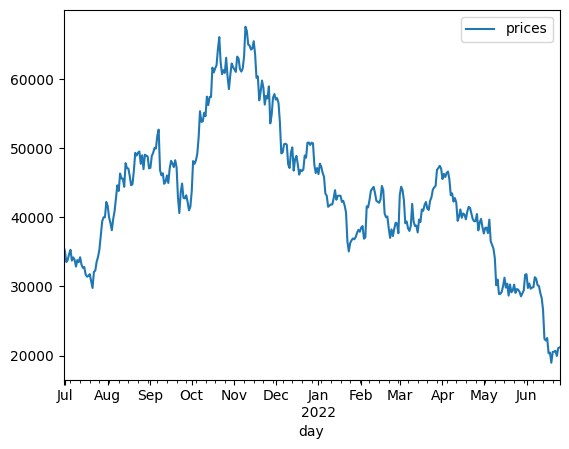

In [ ]:
bitcoin.plot()
plt.show()

# 시계열 예측 모델: ARIMA

1. ARIMA(AutoRegressive Integrated MovingAverage): AR모형과 MA모형 합친것
- AR: 자기 상관성 정보에 기반을 둔 모델
- MA: 어떤 변수의 평균값이 지속적으로 증가하거나 감소하는 경향에 대한 것으로 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론하는 모형

-ARMA 모형에 비정상성을 제거하는 과정을 포함하고 추세 변동의 경향까지 반영한 것이 ARIMA 모형

2. ARIMA 모형은 시계열 데이터의 정상성(Stationary)를 가정한다.
- 정상성: 평균, 분산이 시간에 따라 일정한 성질을 말한다.(즉, 시간의 흐름에 따라 변하지 않음을 의미한다.)
- 추세나 계절성이 있는 시계열은 정상 시계열이 아니다. 이렇듯 정상성을 나타내지 않는 데이터는 복잡한 패턴을 가지고 있어서 모델링하여 분석하기 어렵기 때문에 정상성을 갖도록 로그변환, 차분등의 전처리 작업을 수행한 후 분석한다.
- 변동폭이 일정하지 않은 경우: 로그변환
- 추세, 계절성이 존재하는 경우: 차분(differencing)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# order(AR, d, MA)
# AR: 몇번째 과거까지 학습할것인지, p
# d: 차분횟수
# MA: 오차갯수, q
model = ARIMA(bitcoin.prices.values, order=(2,1,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        07:46:01   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3574      0.009     40.728      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -127.748      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.935      0.000      -0.410      -0.342
ma.L2          0.9980      0.051     19.735      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.55e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.57
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.47e+28. Standard errors may be unstable.
"""

- order(AR= p, d, MA= q)
- 일반적으로 p + q < 2 , p*q = 0
- p와 d, q를 추정할 때 사용하는 ACF plot과 PACF plot을 통해 최적의 모수를 찾아낸다.
- AIC(Akaike's Information Criterion): 일반적인 회귀분석에 쓰이는 지표로 주어진 데이터셋에 대한 모델의 상대적 품질을 평가하는 값을 AIC값이 낮을수록 좋다고 본다.
- BIC(Bayes Information Criteria): AIC의 단점이 표본의 크기가 커질수록 부정확해진다는 것을 보완한 지표
- AIC, BIC를 최소화한다는 것은 우도(likelihood)를 가장 크게 하는 동시에 변수 갯수는 가장 적은 최적의 모델을 의미한다.

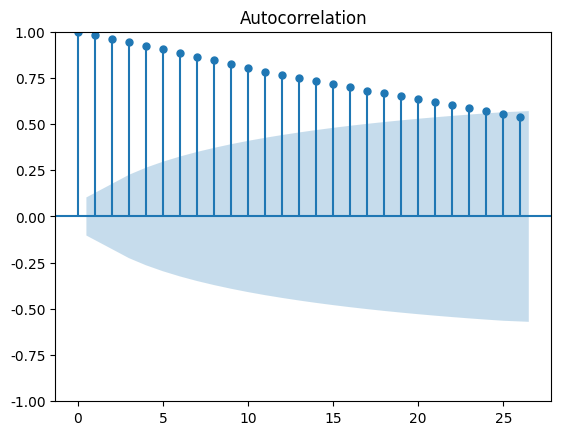

In [ ]:
# ACF plot과 PACF plot은 시계열데이터의 정상성 평가와 ARIMA 모델 파라미터(p,d,q)의 최적의 값을 찾는 역할
# 현재 값이 과거값과 어떤 관계성을 가지고 있는지를 보여준다.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# p: AR 모형의 차수, q: MA 모형의 차수
plot_acf(bitcoin)
plt.show()

**그래프 해석**

- y축의 값들은 ACF, PACF값들을 수치화한 것이고, 시차에 따른 일련의 자기상관을 자기상관함수(ACF)라고 한다.
- ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며, 시차가 커질수록 ACF는 점차 0에 가까워진다.
- ACF는 시계열의 정상성을 평가할 때 유용하다. 정상 시계열의 경우 ACF는 상대적으로 빨리 0으로 접근한다.
- 비정상 시계열의 경우 ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.
- 왼쪽으로부터 첫번째 바는 x가 0인데 이를 현재값이라고 생각하면 된다.
- ACF, PACF의 값이 x가 0일때 무조건 1로 나온다.
- x값이 2이면 2개 전의 값을 말한다.

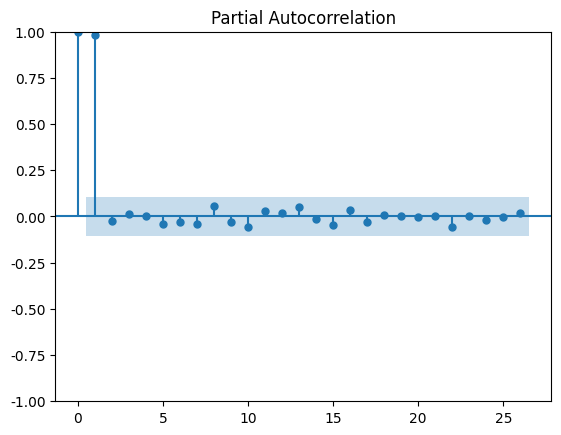

In [ ]:
plot_pacf(bitcoin)
plt.show()

**그래프 해석**

- 실핀처럼 보이는 bar들이 파란색 박스안에 들어가게 되면 그때부터 값이 통계적으로 중요하지 않다고 본다.
- ACF 그래프의 모양이 점점 작아지고, PACF 그래프에서 p개 바 뒤에 그래프가 끊긴다면 AR모델이 적합한 것이고, p값을 AR모델의 파라미터로 쓴다.
- PACF 그래프에서 첫 값으로부터 1개 뒤 이후부터 파란상자 안에 값이 들어가면 그래프가 끊기는 것을 볼 수 있다. 이로부터 이 데이터셋을 사용할 때는 AR(1)모델을 활용하는 것이 가장 정확도가 높을 것이라고 유추할 수 있다.

**최적의(p,d,q)값을 찾는 작업**
- 가장 일반적으로 가능한 모든 (p,d,q)값을 돌려보고 가장 높은 정확도를 주는 쌍을 고르는 것이다,
- AIC값을 찾아서 가장 낮은 값을 선택한다.

In [ ]:
import itertools
p= d = q = range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(bitcoin.prices.values, order= param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 9446.769758583067
(0, 0, 1) 7255.645301422895


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2) 6962.474467168338
(0, 0, 3) 6917.607670676004


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 4) 7061.945656424019
(0, 1, 0) 6303.741389860343
(0, 1, 1) 6305.730358855691
(0, 1, 2) 6304.734306371236
(0, 1, 3) 6306.686736476051
(0, 1, 4) 6307.792260253304
(0, 2, 0) 6530.372506710763
(0, 2, 1) 6387.177279447909
(0, 2, 2) 6355.749542907059
(0, 2, 3) 6357.028434032666
(0, 2, 4) 6357.799883395465
(0, 3, 0) 6894.626800050759
(0, 3, 1) 6521.823705415707
(0, 3, 2) 6348.548380827573
(0, 3, 3) 6343.373602689184


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 3, 4) 6344.091954166028
(0, 4, 0) 7296.421984005839
(0, 4, 1) 6882.212039416471
(0, 4, 2) 6522.144208600757
(0, 4, 3) 6378.759592653823
(0, 4, 4) 6368.9974476751795
(1, 0, 0) 6328.336649701072
(1, 0, 1) 6330.1568269621275
(1, 0, 2) 6330.303215616703
(1, 0, 3) 6332.310375019794
(1, 0, 4) 6333.275626322681
(1, 1, 0) 6305.7258497109
(1, 1, 1) 6307.005774153771
(1, 1, 2) 6306.680226076087
(1, 1, 3) 6308.15231721917
(1, 1, 4) 6309.651863884863
(1, 2, 0) 6481.654674336984
(1, 2, 1) 6361.130232382536
(1, 2, 2) 6357.261349526422
(1, 2, 3) 6359.706835921557
(1, 2, 4) 6359.762762260585
(1, 3, 0) 6758.401816051306
(1, 3, 1) 6448.3943206809745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 3, 2) 6342.157483240526
(1, 3, 3) 6349.739230925787
(1, 3, 4) 6345.065257211922
(1, 4, 0) 7059.305993911956
(1, 4, 1) 6708.20692974189
(1, 4, 2) 6459.003991962931
(1, 4, 3) 6492.9243890721955
(1, 4, 4) 6382.514305249008
(2, 0, 0) 6330.180830083304
(2, 0, 1) 6331.3947685333505
(2, 0, 2) 6332.422681553259
(2, 0, 3) 6333.392642395989
(2, 0, 4) 6335.182909484012
(2, 1, 0) 6304.441517599998
(2, 1, 1) 6306.432590348256


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2) 6300.469769074341


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 3) 6302.557091798429


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 4) 6303.861574763735
(2, 2, 0) 6434.944124879564
(2, 2, 1) 6356.867916583178
(2, 2, 2) 6357.669383929048
(2, 2, 3) 6359.312032657034


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 4) 6357.110860219365
(2, 3, 0) 6649.713562365994
(2, 3, 1) 6413.051329912385


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 2) 6345.625369553307


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3) 6346.5932647669715
(2, 3, 4) 6361.076485394726
(2, 4, 0) 6918.066446534339
(2, 4, 1) 6645.3409464340675
(2, 4, 2) 6441.734313044688
(2, 4, 3) 6458.9904867252735


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 4, 4) 6443.620804828765
(3, 0, 0) 6330.102377316732
(3, 0, 1) 6332.083295070903


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 2) 6327.282443376163


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 3) 6329.8909591481715


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 4) 6331.401258383827
(3, 1, 0) 6306.4042317519015
(3, 1, 1) 6307.920571988217


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 2) 6302.71834815454
(3, 1, 3) 6309.7351799394


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 4) 6306.422925297086
(3, 2, 0) 6408.058426230718
(3, 2, 1) 6358.823949971345
(3, 2, 2) 6359.679298713901
(3, 2, 3) 6361.693571897279


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 4) 6360.543814172016
(3, 3, 0) 6574.61912345804
(3, 3, 1) 6388.286003972749


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 2) 6345.8493062511825


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3) 6357.381001640368


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 4) 6354.258790416075
(3, 4, 0) 6825.603233528071
(3, 4, 1) 6583.064554146711


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 2) 6405.522936113099


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 3) 6447.767283539502


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 4) 6483.329613060843
(4, 0, 0) 6332.053570498914
(4, 0, 1) 6334.109383086028


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 2) 6332.032958405345


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 3) 6331.08446882616


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 4) 6333.103715666302
(4, 1, 0) 6307.4920749788635
(4, 1, 1) 6309.238585560059


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 2) 6303.7266374302235


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 3) 6306.92667319425


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 4) 6304.208491859844
(4, 2, 0) 6394.513611611515
(4, 2, 1) 6359.5212419222735
(4, 2, 2) 6361.621278761139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 3) 6361.810901930424


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 4) 6362.141959711427
(4, 3, 0) 6513.438473140755
(4, 3, 1) 6375.931270068708


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 2) 6363.31774852399


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 3) 6355.4381523685015


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 4) 6355.286653741043
(4, 4, 0) 6742.092438508016
(4, 4, 1) 6526.152009857695


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 2) 6391.202871433835


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 3) 6430.911858345296
(4, 4, 4) 6468.449050471964


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- 가장 최적의 파라미터: (2,1,2) 6300.469769074341

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


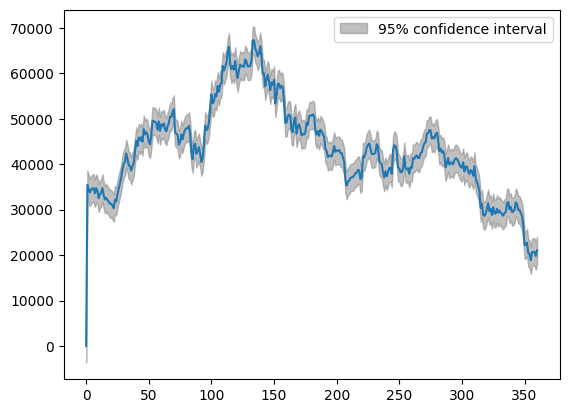

In [ ]:
# ARiMA 모델의 학습 결과를 시각화
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(bitcoin.prices.values, order=(2,1,2))
model_fit = model.fit()

# print(model_fit.summary())
# 학습 데이터에 대한 예측 결과: 첫번째 그래프
fig = sm.graphics.tsa.plot_predict(model_fit)

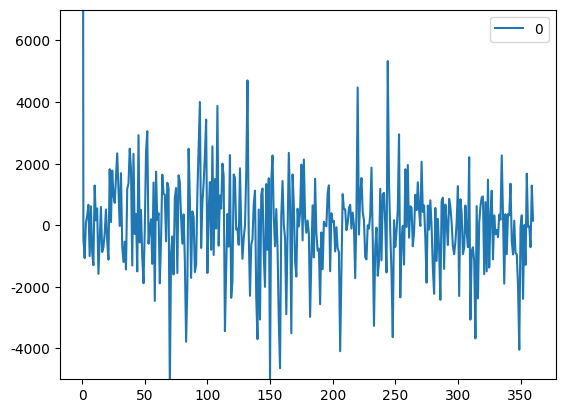

In [ ]:
# 잔차(실측값 - 예측값)의 변동을 시각화하기 위한 데이터프레임
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.ylim(-5000, 7000)
plt.show()

## ARIMA 모델 평가
- model_fit.forecast(steps= 5)

In [ ]:
# 테스트 데이터셋 로딩
# y : 종속변수, 타겟
test = pd.read_csv('market-price-test.csv', names = ['ds', 'y'])

# 학습한 모델을 이용해서 5일뒤의 값을 예측한다.
predict = model_fit.forecast(steps = 5)

# 모델이 예측한 상한값, 하한값
pred_y = predict.tolist()
test_y = test.y.values

In [ ]:
# RMSE(Root Mean Squared Error)
# 모델의 예측값과 실제값의 차이를 하나의 숫자로 표현한 것
# 예측값과 실제값을 뺀후 제곱시킨 값을 다 더하고, N으로 나눈 후 루트를 씌운 값
# 평균제곱근편차, 낮을수록 정확도가 높다고 판단한다.

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))

In [ ]:
rmse

748.6599873541073

## Grid Search
- 최적의 파라미터를 찾기 위해 범위를 이용하여 계산하는 것
- 데이터의 주기성을 고려한 모델이 SARIMAX 모델을 이용한다.
- 페이스북에서 시계열데이터의 트렌드 예측을 분석하는 모델 Prophet

In [ ]:
# progress bar로 표현하는 패키지
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = range(0, 3)
d = range(1, 2)
q = range(0, 6)

pdq = list(itertools.product(p,d,q))

aic= []
params = []

with tqdm(total = len(pdq)) as pg:

    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(bitcoin.prices.values, order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic, 2))
            params.append(i)
        except:
            continue


 83%|████████▎ | 15/18 [00:04<00:01,  2.19it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 89%|████████▉ | 16/18 [00:06<00:01,  1.12it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|█████████▍| 17/18 [00:08<00:01,  1.43s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████| 18/18 [00:13<00:00,  1.36it/s]


In [ ]:
# 18개의 파라미터
optimal = [(params[i], j) for i,j in enumerate(aic) if j == min(aic)]

model_opt = SARIMAX(bitcoin.prices.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        08:01:49   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3574      0.009     40.728      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -127.748      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.935      0.000      -0.410      -0.342
ma.L2          0.9980      0.051     19.735      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.55e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.57
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.47e+28. Standard errors may be unstable.
"""